In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def read_data(file_name='body_level_classification_train.csv'):
    '''
    read data from csv file into pandas dataframe
    labeling categorical data as category type
    separate attributes and classes
    '''
    df = pd.read_csv(file_name)
    df['Gender']=pd.Categorical(df['Gender'])
    df['H_Cal_Consump']=pd.Categorical(df['H_Cal_Consump'])
    df['Alcohol_Consump']=pd.Categorical(df['Alcohol_Consump'])
    df['Smoking']=pd.Categorical(df['Smoking'])
    df['Food_Between_Meals']=pd.Categorical(df['Food_Between_Meals'])
    df['Fam_Hist']=pd.Categorical(df['Fam_Hist'])
    df['H_Cal_Burn']=pd.Categorical(df['H_Cal_Burn'])
    df['Transport']=pd.Categorical(df['Transport'])
    attributes = df[df.columns[:-1]]
    classes=df[df.columns[-1]]
    return df, attributes, classes

In [ ]:
df, attributes, classes = read_data()

In [ ]:
def plot_hist(attributes):
    fig, axs = plt.subplots(4, 4, figsize=(12, 12))
    axs = axs.flatten()
    for i, col in enumerate(attributes.columns):
        axs[i].hist(attributes[col], bins=20)
        axs[i].set_title(col)
    plt.tight_layout()
    plt.show()


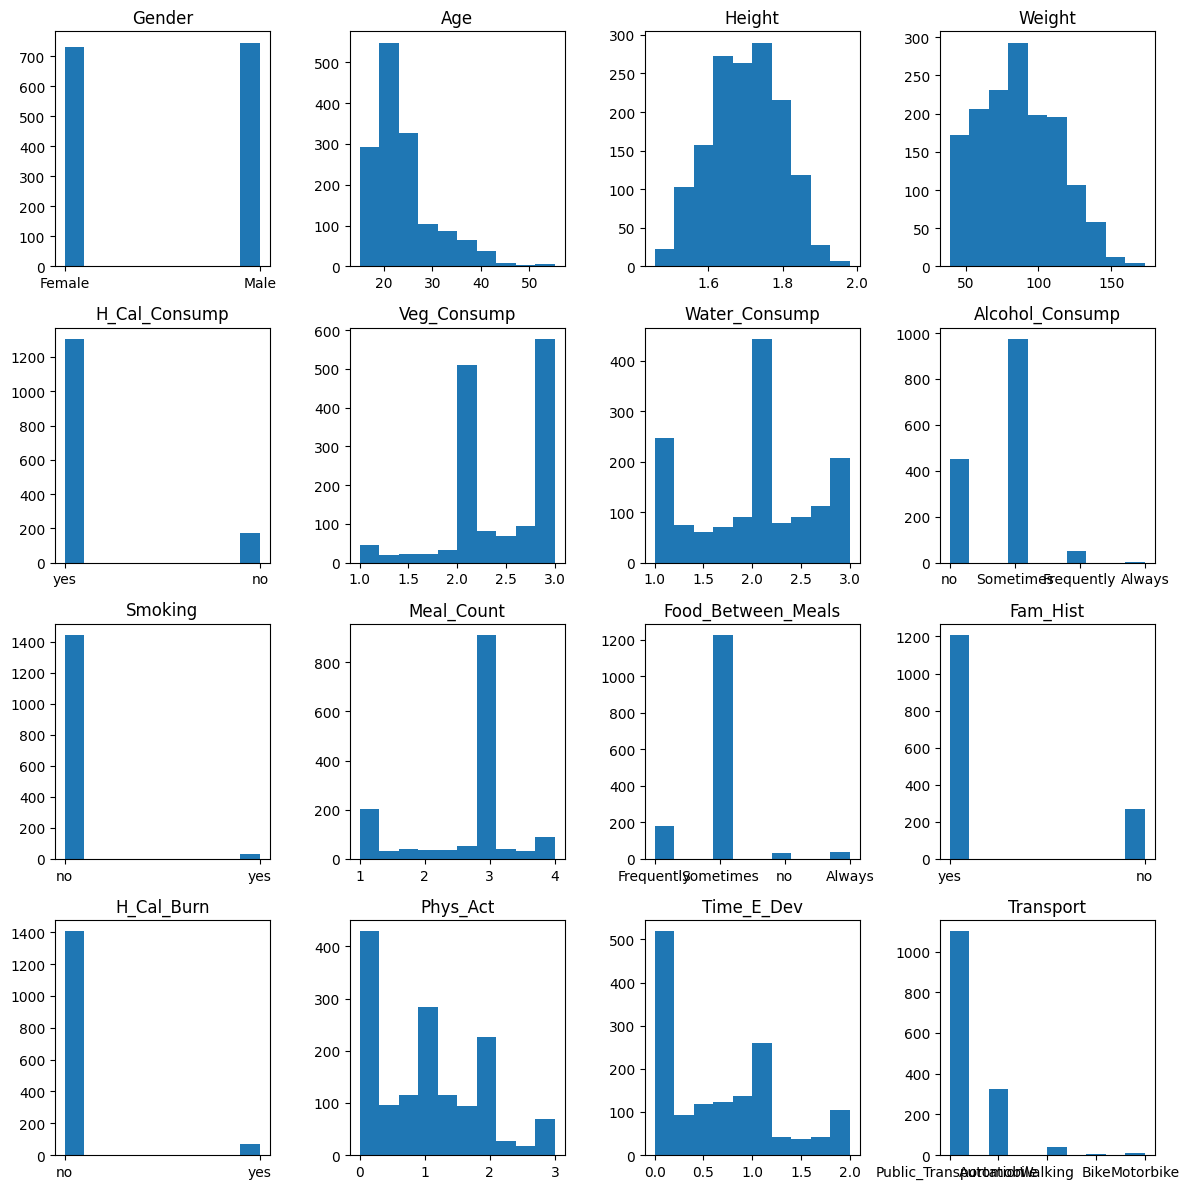

In [ ]:
plot_hist(attributes)

In [ ]:
def check_missing_value():
    '''
    check if there is any missing value in the dataset attributes or classes
    '''
    return attributes.isnull().values.any(), classes.isnull().values.any()

In [ ]:
print(f'attributes missing value: {check_missing_value()[0]}')
print(f'classes missing value: {check_missing_value()[1]}')

attributes missing value: False
classes missing value: False


In [ ]:
def check_outliers():
    for col in attributes.columns:
        if attributes[col].dtype != 'category':
            plt.boxplot(attributes[col])
            plt.title(col)
            plt.show()
            #count number of outliers in each attribute 
            q1 = np.percentile(attributes[col], 25)
            q3 = np.percentile(attributes[col], 75)
            iqr = q3 - q1
            lower_bound = q1 - (1.5 * iqr)
            upper_bound = q3 + (1.5 * iqr)
            print(f'number of outliers in {col}: {len(attributes[(attributes[col] < lower_bound) | (attributes[col] > upper_bound)])}')
    

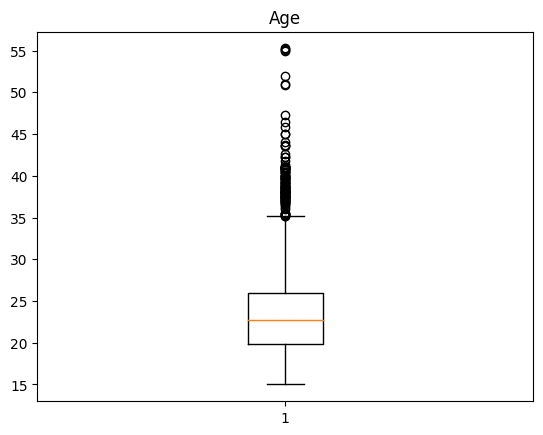

number of outliers in Age: 119


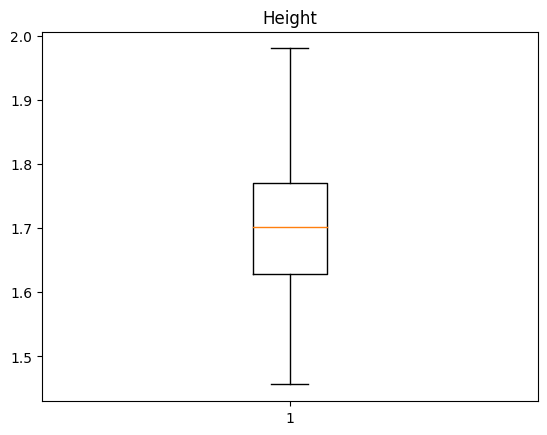

number of outliers in Height: 0


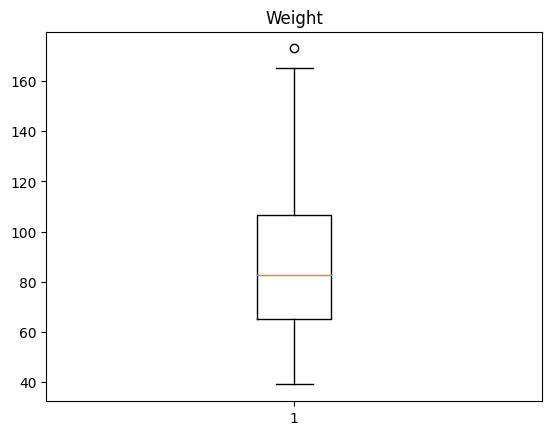

number of outliers in Weight: 1


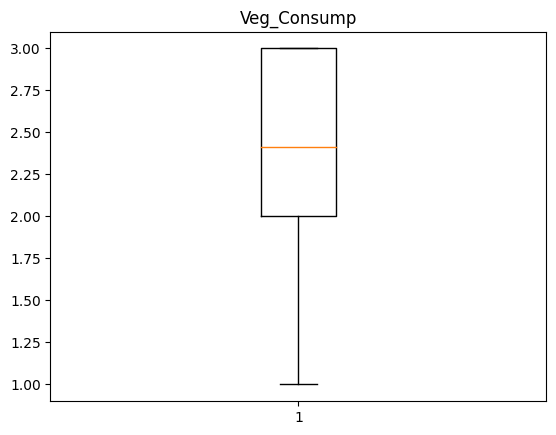

number of outliers in Veg_Consump: 0


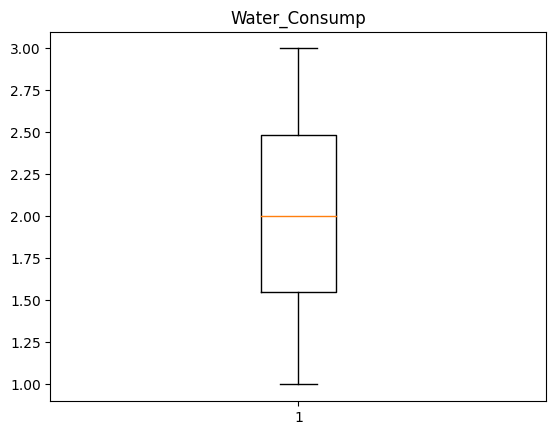

number of outliers in Water_Consump: 0


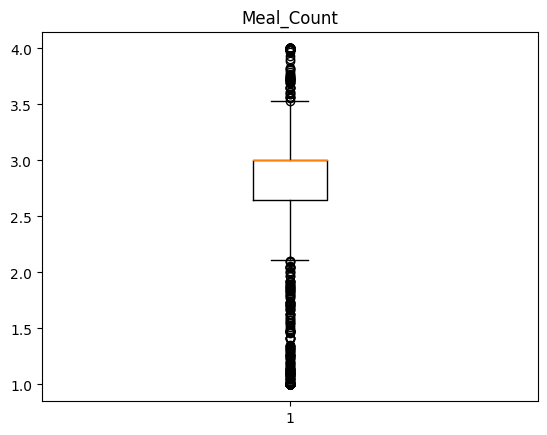

number of outliers in Meal_Count: 405


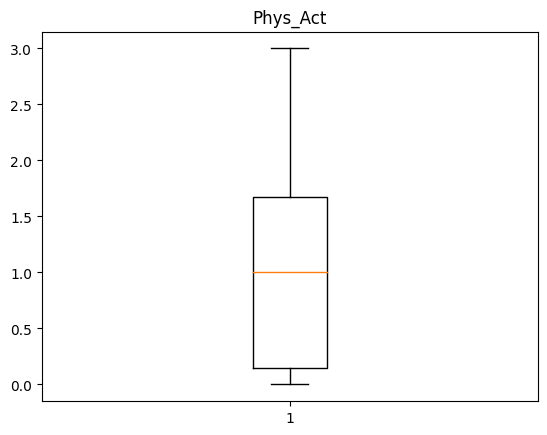

number of outliers in Phys_Act: 0


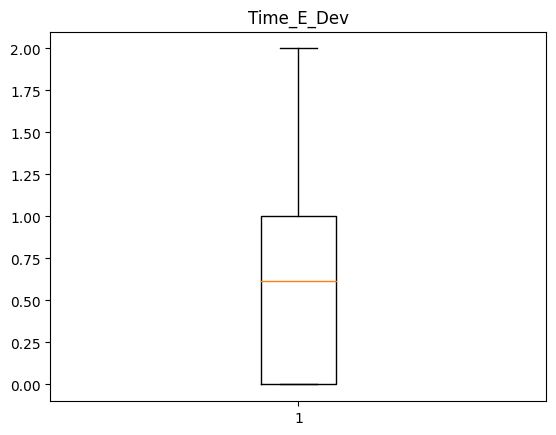

number of outliers in Time_E_Dev: 0


In [ ]:
check_outliers()

In [ ]:
def classes_probability():
    class_prob = {}
    for c in classes.unique():
        class_prob[c] = len(classes[classes == c]) / len(classes)
    return class_prob

In [ ]:
class_prob=classes_probability()
for key, value in class_prob.items():
    print(f'probability of class {key}: {value}')

probability of class Body Level 1: 0.12863913337846988
probability of class Body Level 2: 0.13608666215301288
probability of class Body Level 3: 0.27488151658767773
probability of class Body Level 4: 0.46039268788083954
